In [1]:
import napari
import glob
import os
from tifffile import imread
import numpy as np
import pandas as pd

from tifffile import imwrite

from skimage.util import img_as_ubyte
from PIL import Image, ImageDraw, ImageFont

from matplotlib import pyplot as plt
path = '/run/media/loaloa/lbb_ssd/primitives/'

In [2]:
with napari.gui_qt():
    viewer = napari.Viewer()

In [14]:
which_dataset = 'exp12_DIV14_processed'
# which_dataset = 'exp14_DIV7_processed'
# which_dataset = 'exp14_DIV14_processed'

area = 'G001'

files = glob.glob(f'{path}/{which_dataset}/{area}*')
print(files)

green = imread([f for f in files if 'GFP' in f][0])
red = imread([f for f in files if 'RFP' in f][0])
transm = imread([f for f in files if 'Transmission' in f][0])

['/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_annotated.png', '/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_GFP_compr.tif', '/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_meatadata.pkl', '/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_Prim04_coos.csv', '/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_RFP_compr.tif', '/run/media/loaloa/lbb_ssd/primitives//exp12_DIV14_processed/G001_Transmission_compr.tif']


In [15]:
viewer.add_image(green, colormap='green', blending='additive')
viewer.add_image(red, colormap='red', blending='additive')
viewer.add_image(transm, colormap='gray', opacity=.4)

<Image layer 'transm' at 0x7f7cbf410e50>

In [130]:
primitives = ['Prim01.1', 'Prim01.2', 'Prim03.2', 'Prim02', 'Prim04', 'Prim05',
              'Prim06.1', 'Prim06.3', 'Prim06.2', 'Prim06.4','Prim03.1']
primitive  = 'Prim06.3.5'
primitive  = 'Prim06.3.6'
primitive  = 'Prim06.1.2'
primitive  = 'Prim06.1.1'
primitive  = 'Prim06.2.3'
primitive  = 'Prim06.2.4'
primitive  = 'Prim06.4.7'
primitive  = 'Prim06.4.8'

primitive  = 'Prim01.1'
# primitive  = 'Prim01.2'


# Prim 1, 4, 5, 6 missing  6.1.2, 4.4.7

data = viewer.layers[primitive].data
print(len(data))

final_coos = []
for i, dat in enumerate(data):
    y_topleft, x_topleft = np.min(dat, axis=0)
    y_bottomright, x_bottomright = np.max(dat, axis=0)

    index = [[f'{which_dataset}_{area}'],('y_topleft', 'x_topleft', 'y_bottomright', 'x_bottomright')]
    index = pd.MultiIndex.from_product(index)
    dat = (y_topleft, x_topleft, y_bottomright, x_bottomright)
    s = pd.Series(dat, index=index, name=f'{primitive}_{i+1}of8')
    final_coos.append(s)

final_coos = pd.concat(final_coos, axis=1)
fname = f'{path}/{which_dataset}/{area}_{primitive}_coos.csv'
final_coos.to_csv(fname)

8


In [229]:
all_coos_files = glob.glob(f'{path}/{which_dataset}/G*_coos.csv')
dfs = [pd.read_csv(f, index_col=(0,1)).T.stack(0) for f in all_coos_files]
dfs = pd.concat(dfs).astype(int)

dfs.to_csv(f'{path}/{which_dataset}/region_coordinates.csv')
# dfs

In [237]:
fname = f'{path}/{which_dataset}/region_coordinates.csv'
coos = pd.read_csv(fname, index_col=(0,1))

coos

,,x_bottomright,x_topleft,y_bottomright,y_topleft
Prim03.2_1of8,exp14_DIV14_processed_G002,9107,6190,814,53
Prim03.2_2of8,exp14_DIV14_processed_G002,3143,234,801,68
Prim03.2_3of8,exp14_DIV14_processed_G002,12035,9118,1623,862
Prim03.2_4of8,exp14_DIV14_processed_G002,6176,3260,817,57
Prim03.2_5of8,exp14_DIV14_processed_G002,9079,6163,1623,862
Prim03.2_6of8,exp14_DIV14_processed_G002,6150,3234,1616,856
Prim03.2_7of8,exp14_DIV14_processed_G002,3156,239,1584,823
Prim03.2_8of8,exp14_DIV14_processed_G002,12041,9125,817,57
Prim06.1.1_1of1,exp14_DIV14_processed_G007,1695,1016,2738,161
Prim06.1.2_1of1,exp14_DIV14_processed_G007,2743,120,1763,1145


In [238]:
areas = [idx[-4:] for idx in coos.index.unique(1)]
print(areas)

for area in areas:
    print()
    print(area)
    files = glob.glob(f'{path}/{which_dataset}/{area}*')
    green = imread([f for f in files if 'GFP' in f][0])
    red = imread([f for f in files if 'RFP' in f][0])
    transm = imread([f for f in files if 'Transmission' in f][0])

    area_coos = coos.loc[(slice(None), f'{which_dataset}_{area}'), :]
    area_primitives = np.unique([p[:p.rfind('_')] for p in area_coos.index.unique(0)])

    for area_prim in area_primitives:
        print(area_prim)
        prim_coos = area_coos.index.get_level_values(0).str.contains(area_prim)
        
        prim_canvas = np.zeros((20000, 6000, 3), np.uint16)
        insert_y, insert_x = 0, 0
        insert_x_max = 0
        for replicate, replicate_coos in area_coos[prim_coos].iterrows():
            y_from = replicate_coos['y_topleft' ]
            x_from = replicate_coos['x_topleft']
            y_to = replicate_coos['y_bottomright']
            x_to = replicate_coos['x_bottomright']

            print(replicate)

            g = green[y_from:y_to, x_from:x_to]
            r = red[y_from:y_to, x_from:x_to]
            b = transm[y_from:y_to, x_from:x_to]
            img = np.stack([g,r,b], -1)

            prim_canvas[insert_y:insert_y+img.shape[0], insert_x:img.shape[1], :] = img

            insert_y += img.shape[0] + 50
            insert_x_max = img.shape[1] if img.shape[1] > insert_x_max else insert_x_max

        prim_canvas = prim_canvas[:insert_y+50, :insert_x_max]
        viewer.add_image(np.moveaxis(prim_canvas, -1,0), name=str(area_prim), contrast_limits=(0, 16000), visible=False)
        fname = f'{path}/processed2/{which_dataset}_{area_prim}_{area}.npy'
        # np.save(fname, prim_canvas)

        prim_canvas = Image.fromarray(img_as_ubyte(prim_canvas))
        draw = ImageDraw.Draw(prim_canvas)
        pil_font = ImageFont.truetype("/home/loaloa/.fonts/c/cmunbi.ttf", 30)
        
        lbl = f'{which_dataset}_{area_prim}_{area}'
        draw.text((10,10), lbl,  font=pil_font, fill="#ffffff")
        imwrite(fname.replace('.npy', '.png'), np.asarray(prim_canvas))

['G002', 'G007', 'G008', 'G009', 'G003', 'G004', 'G005', 'G006', 'G010', 'G012']

G002
Prim03.2
('Prim03.2_1of8', 'exp14_DIV14_processed_G002')
('Prim03.2_2of8', 'exp14_DIV14_processed_G002')
('Prim03.2_3of8', 'exp14_DIV14_processed_G002')
('Prim03.2_4of8', 'exp14_DIV14_processed_G002')
('Prim03.2_5of8', 'exp14_DIV14_processed_G002')
('Prim03.2_6of8', 'exp14_DIV14_processed_G002')
('Prim03.2_7of8', 'exp14_DIV14_processed_G002')
('Prim03.2_8of8', 'exp14_DIV14_processed_G002')

G007
Prim06.1.1
('Prim06.1.1_1of1', 'exp14_DIV14_processed_G007')
Prim06.1.2
('Prim06.1.2_1of1', 'exp14_DIV14_processed_G007')

G008
Prim06.3.5
('Prim06.3.5_1of1', 'exp14_DIV14_processed_G008')
Prim06.3.6
('Prim06.3.6_1of1', 'exp14_DIV14_processed_G008')

G009
Prim06.2.3
('Prim06.2.3_1of1', 'exp14_DIV14_processed_G009')
Prim06.2.4
('Prim06.2.4_1of1', 'exp14_DIV14_processed_G009')

G003
Prim01.1
('Prim01.1_1of8', 'exp14_DIV14_processed_G003')
('Prim01.1_2of8', 'exp14_DIV14_processed_G003')
('Prim01.1_3of8', 'exp14_

In [4]:
all_files = []
for f in glob.glob(f'{path}/processed2/*png'):
    experiment = f[f.rfind('/')+1:f.rfind('/')+12]
    experiment = experiment[:-1] if experiment.endswith('_') else experiment
    DIV = experiment[6:]
    prim = f[f.rfind('Prim'):f.rfind('_')]
    mic_area = f[f.rfind('_')+1:f.rfind('_')+5]
    
    all_files.append(pd.Series([f], name=(prim,DIV,experiment,mic_area)))

all_files = pd.concat(all_files, axis=1).T.sort_index()
all_files.to_csv(f'{path}/processed2/file_index.csv')
all_files

0
Prim01.1   DIV14 exp12_DIV14 G025  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G003  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G001  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim01.2   DIV14 exp12_DIV14 G025  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G003  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G001  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim02     DIV14 exp14_DIV14 G004  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G002  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim03.1   DIV14 exp14_DIV14 G012  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G013  /run/media/loaloa/lbb_ssd/primitives//processe...
                             G014  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim03.2   DIV14 exp14_DIV14 G002  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G015  /run/media/loaloa/lbb_ssd/primitives//processe...
                             G016  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim04     DIV14 exp12_DIV14 G001  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G005  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G003  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim05     DIV14 exp12_DIV14 G002  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G006  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G004  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.1.1 DIV14 exp12_DIV14 G007  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G007  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G009  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.1.2 DIV14 exp14_DIV14 G007  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G010  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.2.3 DIV14 exp12_DIV14 G003  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G009  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G005  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.2.4 DIV14 exp12_DIV14 G004  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G009  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G006  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.3.5 DIV14 exp12_DIV14 G005  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G008  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G007  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.3.6 DIV14 exp12_DIV14 G006  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G008  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G008  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.4.7 DIV14 exp14_DIV14 G010  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G011  /run/media/loaloa/lbb_ssd/primitives//processe...
Prim06.4.8 DIV14 exp12_DIV14 G010  /run/media/loaloa/lbb_ssd/primitives//processe...
                 exp14_DIV14 G010  /run/media/loaloa/lbb_ssd/primitives//processe...
           DIV7  exp14_DIV7  G012  /run/media/loaloa/lbb_ssd/primitives//processe...

In [3]:
all_files = pd.read_csv(f'{path}/processed2/file_index.csv', index_col=(0,1,2,3))
primitives = all_files.index.unique(0)
print(primitives)
divs = all_files.index.unique(1)
print(divs)
print()

prim = primitives[1]
div = divs[1]
lbl = f'{prim}_{div}'
dest_dir = f'{path}/processed2/results/{lbl}_masks/'
print(lbl)

files = all_files.loc[(prim, div)].values.flatten()
print(files)

png_images = [np.asarray(Image.open(f)) for f in files]
npy_images = [np.load(f.replace('.png', '.npy')) for f in files]

to_yshape = np.max([i.shape[0] for i in npy_images])
png_images = [np.pad(im, ((to_yshape-im.shape[0],0), (0,0), (0,0)), mode='constant') for im in png_images]
npy_images = [np.pad(im, ((to_yshape-im.shape[0],0), (0,0), (0,0)), mode='constant') for im in npy_images]

png_prim_im = np.concatenate(png_images, 1)
npy_prim_im = np.concatenate(npy_images, 1)[...,:2].astype(float) /2**16

print(npy_prim_im.shape)


viewer.add_image(png_prim_im, name=prim+'_'+div)
# viewer.add_image(npy_prim_im, name='npy'+prim+div)

Index(['Prim01.1', 'Prim01.2', 'Prim02', 'Prim03.1', 'Prim03.2', 'Prim04',
       'Prim05', 'Prim06.1.1', 'Prim06.1.2', 'Prim06.2.3', 'Prim06.2.4',
       'Prim06.3.5', 'Prim06.3.6', 'Prim06.4.7', 'Prim06.4.8'],
      dtype='object')
Index(['DIV14', 'DIV7'], dtype='object')

Prim01.2_DIV7
['/run/media/loaloa/lbb_ssd/primitives//processed2/exp14_DIV7_processed_Prim01.2_G001.png']
(2122, 786, 2)


<Image layer 'Prim01.2_DIV7' at 0x7f81077ffc10>

In [4]:
add_n_shape_layers = 8
for i in range(1, add_n_shape_layers+1):
    viewer.add_labels(np.zeros(png_prim_im.shape[:2], int), name=f'{lbl}_{i:0>2}_lbl')
    # break

In [5]:
layers = [np.load(f) for f in glob.glob(f'{path}/processed2/results/{lbl}_masks/*')]
[viewer.add_labels(dat, name=f'{lbl}_{i:0>2}_lbl') for i, dat in enumerate(layers)]
[print(d.shape) for d in layers]

[]

In [6]:
os.makedirs(dest_dir, exist_ok=True)
layers = [l for l in viewer.layers if l.name.endswith('_lbl')]
[np.save(f'{dest_dir}/{l.name}_mask.npy', l.data) for l in layers]

all_masks = np.stack([l.data for l in layers], axis=-1).sum(-1)
u = np.unique(all_masks, return_counts=True)
u


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([1632654,    2068,    2055,    2163,    1257,    1227,    1319,
           2103,    2137,    2074,    2075,    2166,    2166,    1929,
           1973,    2009,    2159,    2166,    2192]))

In [7]:
# {               # r     $d
#     'Prim01.1': 
# }
min_int_thr = .04
min_seg_area_size = 100

In [8]:
data = []
confirmation_canvas = np.zeros_like(png_prim_im, float)
confirmation_mask = np.zeros(png_prim_im.shape[:2], int)
for i in range(len(layers)):
    print('layer ', i, end='...   ')
    dat = layers[i].data
    
    for j in range(6):
        for k in range(3):
            mask_idx = j*3 +k +1
            mask = dat==mask_idx

            channel_region = npy_prim_im[mask]
            if mask.sum() > min_seg_area_size:
                median_int = np.median(channel_region, 0)
            else:
                median_int = [0, 0]

            confirmation_canvas[mask, 0] = median_int[0]
            confirmation_canvas[mask, 1] = median_int[1]

            if k == 0:
                channel = 'inlet'
                confirmation_mask[mask] = 1
            elif k == 1:
                channel = 'straight'
                confirmation_mask[mask] = 2
            elif k == 2:
                channel = 'turn'
                confirmation_mask[mask] = 3

            
            idx = pd.MultiIndex.from_tuples(((j, i, channel, 'RFP'), (j, i, channel, 'GFP')), 
                                            name=('design','replicate', 'channel', 'color'))
            data.append(pd.Series(median_int, index=idx, name=(lbl)))

viewer.add_image(confirmation_canvas, blending='additive', contrast_limits=(0,.05))
confirmation_canvas[confirmation_canvas<min_int_thr] = 0
viewer.add_image(confirmation_canvas, blending='additive', contrast_limits=(0,.05))
imwrite(f'{dest_dir}/segmentation_overview.png', img_as_ubyte(confirmation_canvas))

viewer.add_labels(confirmation_mask, blending='additive')



layer  0...   layer  1...   layer  2...   layer  3...   layer  4...   layer  5...   layer  6...   layer  7...   

<Labels layer 'confirmation_mask' at 0x7f80e98b8eb0>

In [12]:
data = pd.concat(data, axis=0).to_frame()
data.to_csv(f'{dest_dir}/{lbl}_intensities.csv')
data

Prim01.2_DIV7
design replicate channel  color               
0      0         inlet    RFP         0.000000
                          GFP         0.000000
                 straight RFP         0.000000
                          GFP         0.000000
                 turn     RFP         0.000000
...                                        ...
5      7         inlet    GFP         0.107910
                 straight RFP         0.037598
                          GFP         0.154175
                 turn     RFP         0.037842
                          GFP         0.038086

[288 rows x 1 columns]

In [13]:
# col = data.index.get_level_values(3)
# greens = data[col=='GFP']
# reds = data[col=='RFP']
# %matplotlib qt5
# plt.hist(reds, bins=150, alpha=.5, range=(0,.10))
# plt.hist(greens, bins=150, alpha=.5, range=(0,.10))

data[data<min_int_thr] = 0

In [14]:
def get_metric(which_metric, dat):
    inlet = dat[slice(None),slice(None),'inlet']
    straight = dat[slice(None),slice(None),'straight']
    turn = dat[slice(None),slice(None),'turn']

    if which_metric == 'diff_ratio':
        m = (straight-turn) /inlet
        if (inlet == 0).all():
            m.loc[:] = np.nan
    
    return m
    # m.index = pd.MultiIndex.from_tuples([(*m.index[0], 'metric'),], names=m.index.names+['inlet'])
    # return m.swaplevel()
    


which_metric = 'diff_ratio'
all_metric = []
for datapoint in data.index.droplevel([2,3]).unique():
    
    col_metrics = []
    for color in data.index.unique('color'):
        col_dat = data.loc[(*datapoint, slice(None), color), lbl]
        col_metrics.append(get_metric(which_metric, col_dat))
        
    datapoint_metric = pd.concat(col_metrics).mean()
    idx = pd.MultiIndex.from_tuples([datapoint], names=data.index.names[:2])
    all_metric.append(pd.Series([datapoint_metric], index=idx, name=which_metric))


    

all_metrics = pd.concat(all_metric).to_frame()
all_metrics.to_csv(f'{dest_dir}/{lbl}_metrics.csv')
all_metrics

,,diff_ratio
design,replicate,
0,0,NaN
1,0,NaN
2,0,1.199288
3,0,0.683064
4,0,NaN
5,0,1.328416
0,1,1.088193
1,1,NaN
2,1,NaN


design  replicate
0       0                 NaN
1       0                 NaN
2       0            1.199288
3       0            0.683064
4       0                 NaN
5       0            1.328416
0       1            1.088193
1       1                 NaN
2       1                 NaN
3       1                 NaN
4       1            0.642674
5       1            1.853448
0       2            0.697856
1       2                 NaN
2       2            0.830247
3       2            0.951613
4       2            0.231678
5       2            1.230894
0       3            3.062963
1       3            0.127246
2       3            1.160853
3       3            1.237361
4       3            0.238570
5       3            0.000000
0       4                 NaN
1       4                 NaN
2       4            0.467790
3       4                 NaN
4       4                 NaN
5       4                 NaN
0       5            0.752108
1       5            1.298319
2       5             

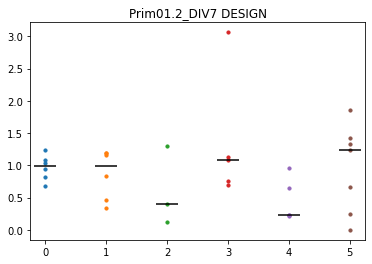

In [25]:
all_metrics = pd.read_csv(f'{dest_dir}/{lbl}_metrics.csv', index_col=(0,1)).iloc[:,0]
print(all_metrics)

designs = all_metrics.index.unique('design')
# for Prim1.2
designs = [3,2,1,0,4,5]

%matplotlib inline

plt.title(lbl+' DESIGN')
for xloc, d in enumerate(designs):
    print(xloc, d)
    design_metrics = all_metrics[d]
    median = design_metrics.median()
    xlocs = [xloc]*len(design_metrics)
    
    plt.scatter(xlocs, design_metrics, s=10)
    plt.scatter(xloc, median, marker='_', s=500, color='k')




